In [128]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Dense, Input
from keras.datasets import cifar10
from keras.regularizers import l1
from keras.optimizers import Adam

In [129]:
(x_train,_),(x_test,_) = cifar10.load_data()

In [130]:
x_train = x_train.astype('float32') / 255.

x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), -1))

x_test = x_test.reshape((len(x_test),-1))

In [131]:
x_train.shape

(50000, 3072)

In [132]:
input_size = 32*32*3
hidden_size = 256
code_size = 128

input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_img = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(input_img, output_img)

encoder = Model(input_img,code)

code_enc = Input(shape=(code_size,))
a = Dense(hidden_size, activation='relu')(code_enc)
decoded = Dense(input_size, activation='sigmoid')(a)

decoder = Model(code_enc,decoded)


autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [155]:
input_size = 32*32*3
hidden_size = 256
code_size = 128
input_img2 = Input(shape=(input_size,))
hidden_1_ = Dense(hidden_size, activation='relu')(input_img2)
code2 = Dense(code_size, activation='relu')(hidden_1_)
hidden_2_ = Dense(hidden_size, activation='relu')(code2)
output_img2 = Dense(input_size, activation='sigmoid')(hidden_2_)
autoencoder_noisy = Model(input_img2, output_img2)

encoder2 =Model(input_img2,code2)

code_enc2 = Input(shape=(code_size,))
a2 = Dense(hidden_size, activation='relu')(code_enc2)
decoded2 = Dense(input_size, activation='sigmoid')(a2)

decoder2 = Model(code_enc2,decoded2)

autoencoder_noisy.compile(optimizer='adam', loss='binary_crossentropy')

In [133]:
autoencoder.fit(x_train, x_train,

epochs=10,

shuffle=True

)

Epoch 1/10
1563/1563 [==============================] - 6s 3ms/step - loss: 0.6016
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5824
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5794
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5777
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5767
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5757
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5751
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5746
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5741
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5739


In [135]:
autoencoder.evaluate(x_test,x_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.5747


0.5746735334396362

In [136]:
k = 0

for i in range (4,8):

    decoder.weights[k].assign(autoencoder.weights[i])

    k = k+1

In [137]:
encoded_imgs = encoder.predict(x_test)

decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 0s 1ms/step


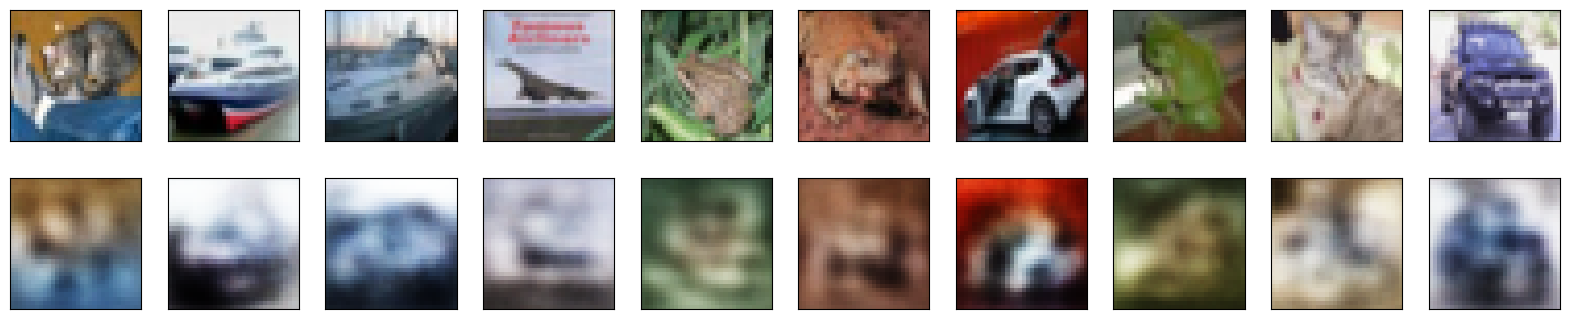

In [168]:
n = 10
plt.figure(figsize=(20, 4))

for i in range(n):

    ax = plt.subplot(2, n, i + 1)

    plt.imshow(x_test[i].reshape(32, 32,3))

    plt.gray()

    ax.get_xaxis().set_visible(False)

    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)

    plt.imshow(decoded_imgs[i].reshape(32, 32,3))

    plt.gray()

    ax.get_xaxis().set_visible(False)

    ax.get_yaxis().set_visible(False)

plt.show()

In [156]:
mean = 0
std = 10
gauss_noise = np.random.normal(mean,std,size=x_train.shape) 
gauss_noise_test = np.random.normal(mean,std,size=x_test.shape) 
noise_factor = 0.02 
x_train_noisy = x_train + noise_factor * gauss_noise
x_test_noisy = x_test + noise_factor * gauss_noise_test

x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)

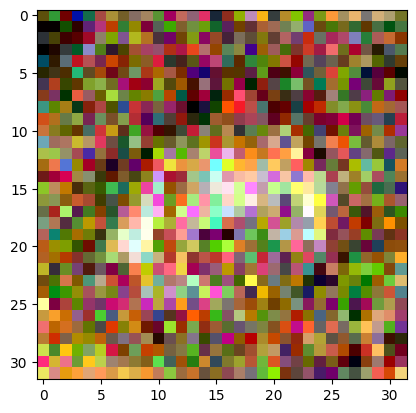

In [157]:
plt.imshow(x_train_noisy[0].reshape(32,32,3))

In [159]:
autoencoder_noisy.fit(x_train_noisy, x_train,

epochs=10,

shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 6s 3ms/step - loss: 0.6064
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5869
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5840
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5826
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5818
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5811
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5805
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5801
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5797
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5792


In [160]:
autoencoder_noisy.evaluate(x_test_noisy,x_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.5820


0.5819697976112366

In [161]:
k = 0

for i in range (4,8):

    decoder2.weights[k].assign(autoencoder_noisy.weights[i])

    k = k+1

In [162]:
encoded_imgs = encoder2.predict(x_test_noisy)

decoded_imgs = decoder2.predict(encoded_imgs)

313/313 [==============================] - 0s 1ms/step


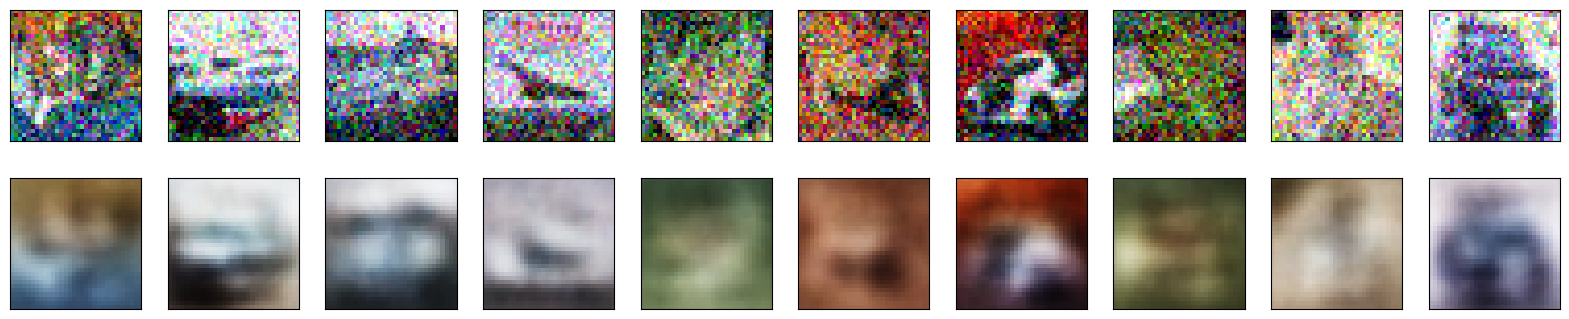

In [163]:
n = 10

plt.figure(figsize=(20, 4))

for i in range(n):

    ax = plt.subplot(2, n, i + 1)

    plt.imshow(x_test_noisy[i].reshape(32, 32,3))

    plt.gray()

    ax.get_xaxis().set_visible(False)

    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)

    plt.imshow(decoded_imgs[i].reshape(32, 32,3))

    plt.gray()

    ax.get_xaxis().set_visible(False)

    ax.get_yaxis().set_visible(False)

plt.show()

In [164]:
encoded_imgs = encoder.predict(x_test)

mean = 0
std = 10
gauss_noise = np.random.normal(mean,std,size=encoded_imgs.shape) 

noise_factor = 0.02 
encoded_imgs_noisy = encoded_imgs + noise_factor * gauss_noise


# encoded_imgs_noisy = np.clip(encoded_imgs_noisy, 0.0, 1.0)


decoded_imgs = decoder.predict(encoded_imgs_noisy)

313/313 [==============================] - 0s 1ms/step


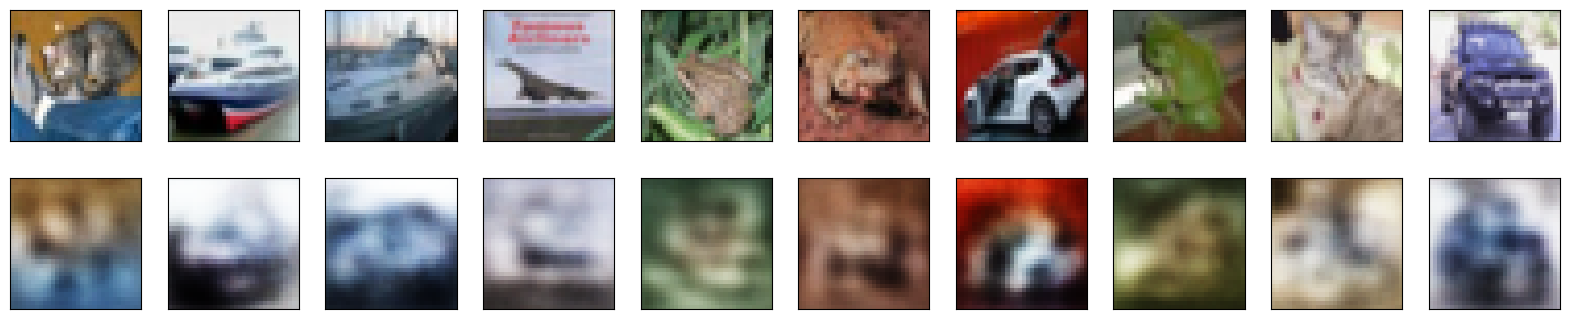

In [165]:
n = 10

plt.figure(figsize=(20, 4))

for i in range(n):

    ax = plt.subplot(2, n, i + 1)

    plt.imshow(x_test[i].reshape(32, 32,3))

    plt.gray()

    ax.get_xaxis().set_visible(False)

    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)

    plt.imshow(decoded_imgs[i].reshape(32, 32,3))

    plt.gray()

    ax.get_xaxis().set_visible(False)

    ax.get_yaxis().set_visible(False)

plt.show()